Text(0.5, 0, 'Number of epochs')

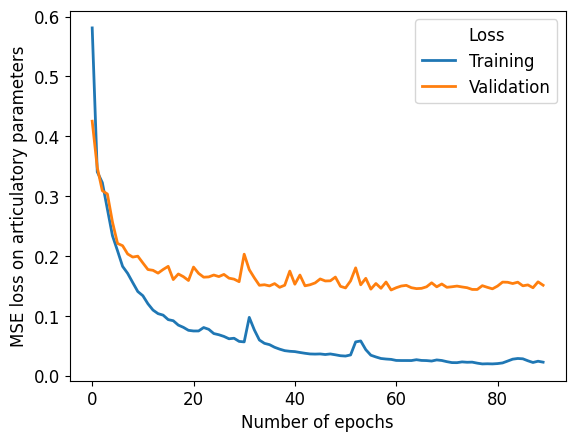

In [1]:
import pickle
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.serif'] = 'Arial'
matplotlib.rcParams.update({'font.size': 12, 'legend.handleheight':1, 'hatch.linewidth': 1.0,
                           'lines.markersize':4, 'lines.linewidth':2})

agent_path = "../out/inverse_model/full_pb"
with open("%s/metrics.pickle" % agent_path, "rb") as f:
        loss = pickle.load(f)
        
plt.plot(loss['train']['mse_art'], label='Training')
plt.plot(loss['validation']['mse_art'], label='Validation')
plt.legend(title='Loss')
plt.ylabel('MSE loss on articulatory parameters')
plt.xlabel('Number of epochs')
#plt.savefig('/home/engaclew/Downloads/mse_art.png', dpi=300)

item_0795


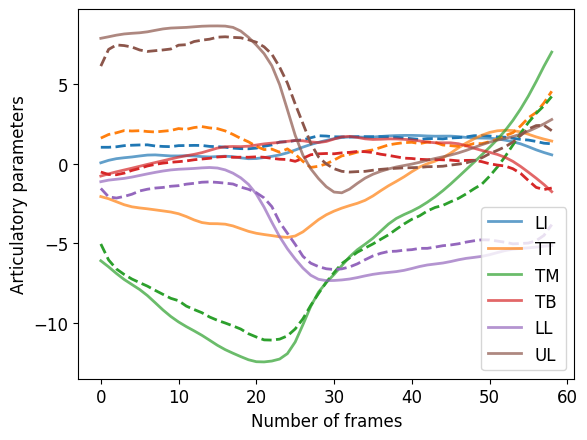

item_0523


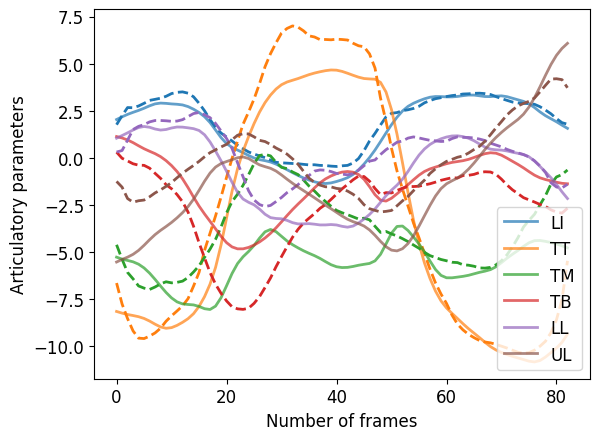

item_0565


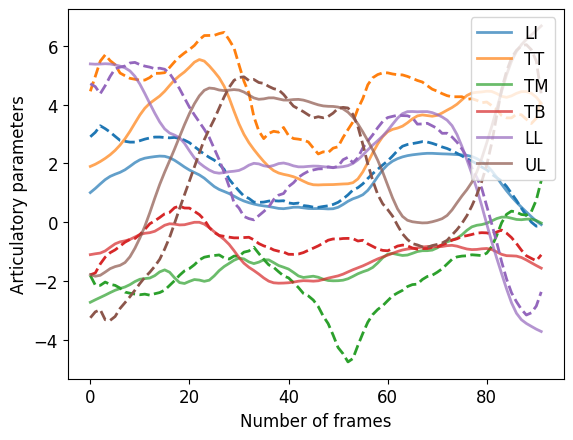

item_0240


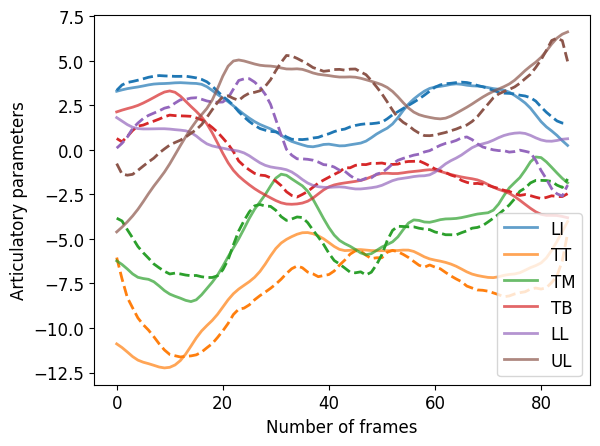

item_1013


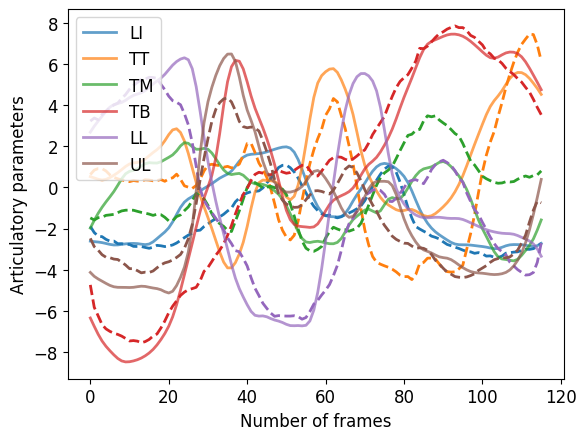

item_0529


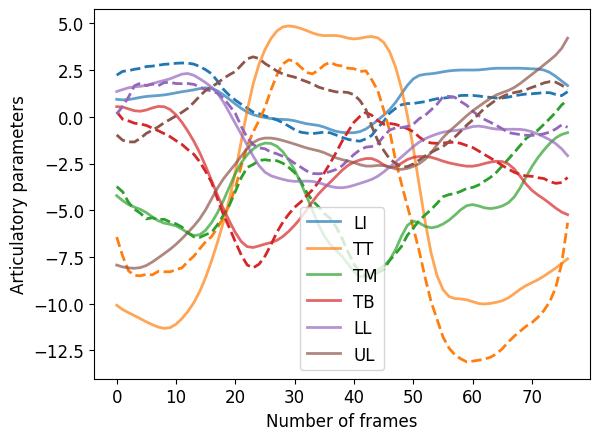

item_0252


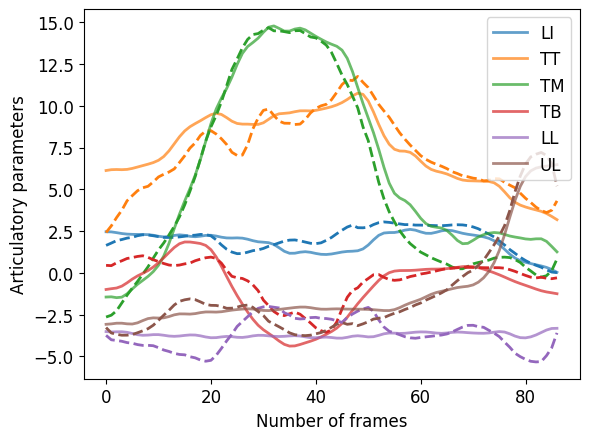

item_0231


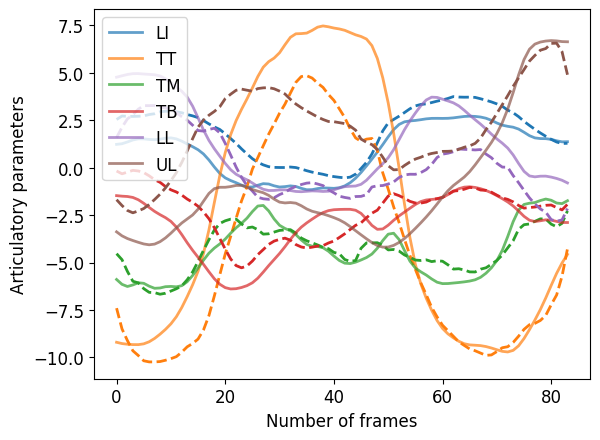

item_0802


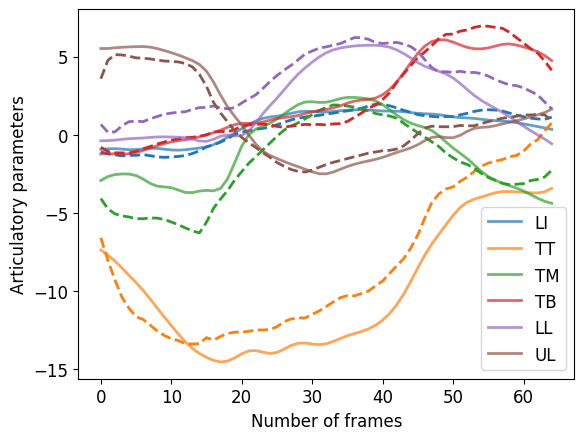

item_1102


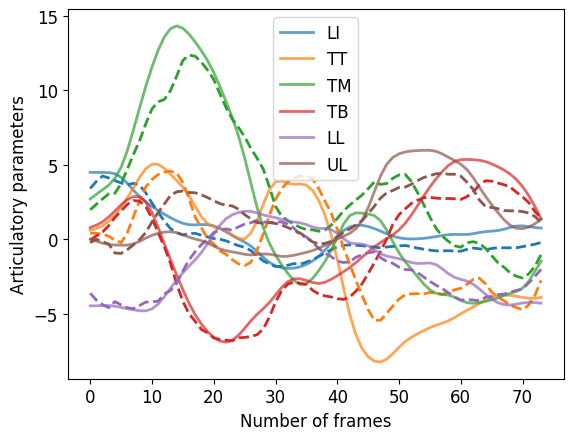

item_0572


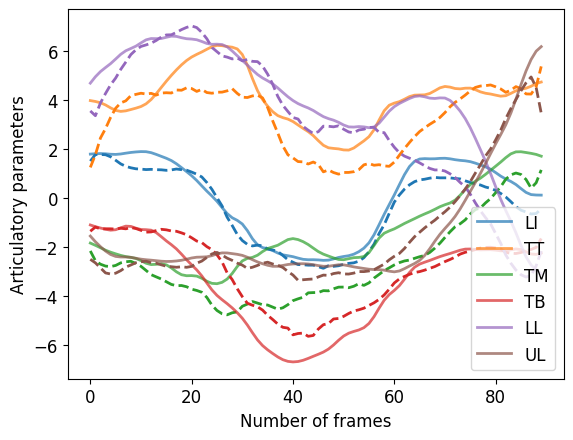

item_0811


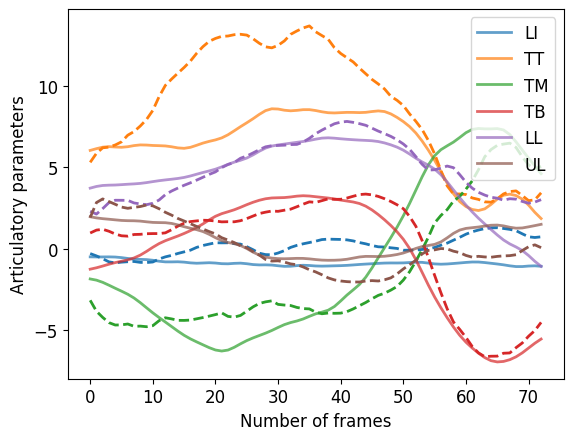

item_0903


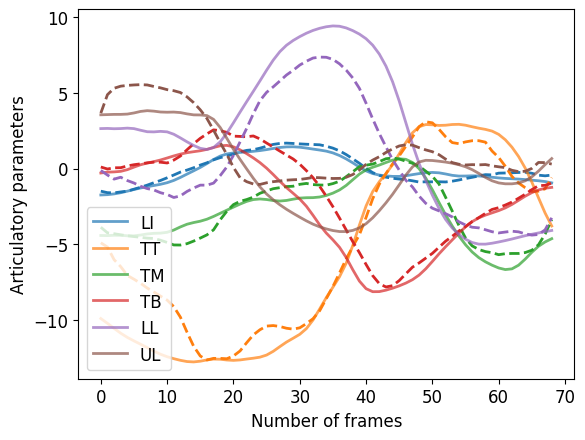

item_0045


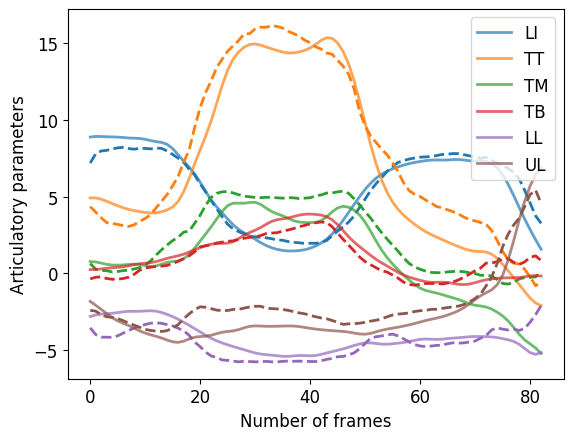

item_0198


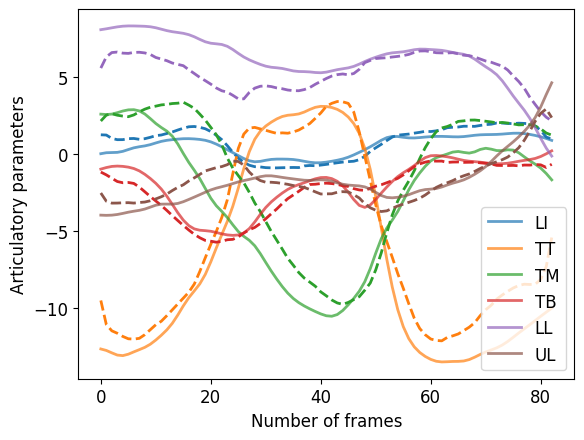

item_0451


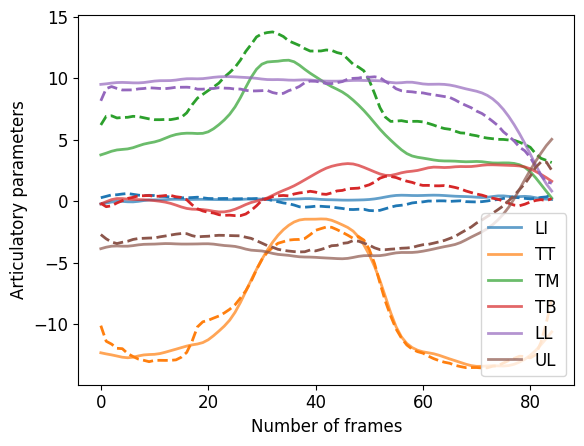

item_0444


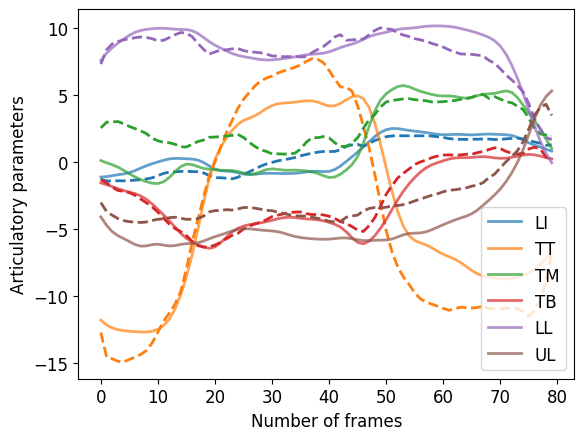

item_0168


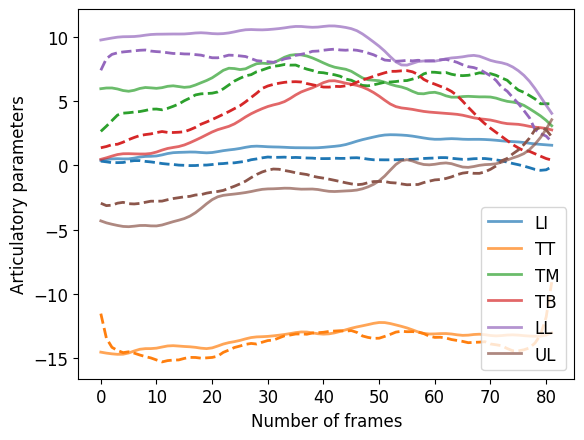

item_0473


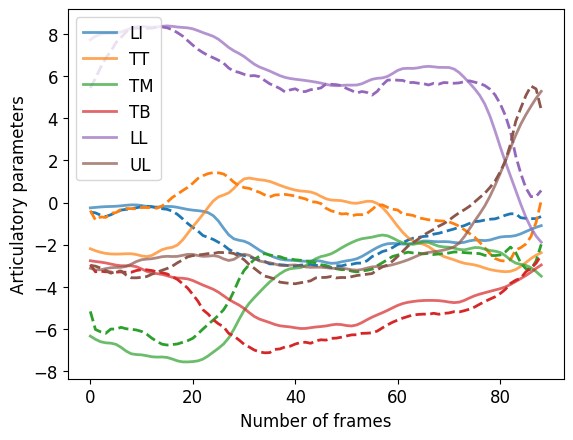

item_0243


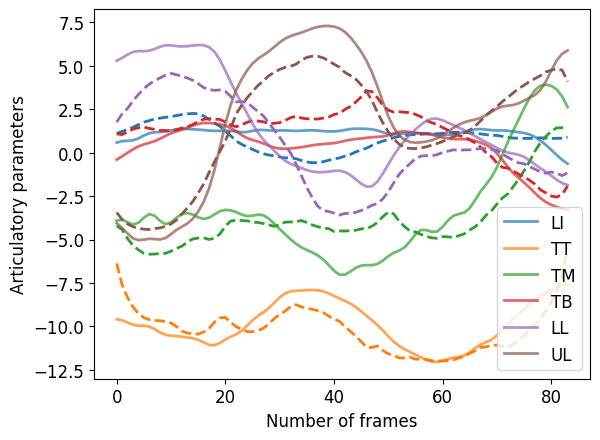

In [2]:
from inverse_model import InverseModel

inverse_model = InverseModel.reload(agent_path)
item = inverse_model.datasplits[2][0]
dataset = inverse_model.dataset
art_seqs = dataset.get_items_data('art_params', cut_silences=True)
sound_seqs = dataset.get_items_data('cepstrum', cut_silences=True)


for item in inverse_model.datasplits[2][:20]:
    print(item)
    art_seq = art_seqs[item]
    sound_seq = sound_seqs[item]
    art_seq_estimated = inverse_model.predict_art(sound_seq)
    labels = ['LI', 'TT', 'TM', 'TB', 'LL', 'UL']
    prop_cycle = plt.rcParams['axes.prop_cycle']
    colors = prop_cycle.by_key()['color']
    for i, label in enumerate(labels):
        plt.plot(art_seq_estimated[:,i], linestyle='--', color=colors[i])
        plt.plot(art_seq[:,i], label=label, color=colors[i], alpha=.7)
        plt.ylabel('Articulatory parameters')
        plt.xlabel('Number of frames')
        plt.legend()
    plt.show()